In [14]:
import pandas as pd

# lakeFS credentials from your docker-compose.yml
ACCESS_KEY = "access_key"
SECRET_KEY = "secret_key"

# lakeFS endpoint (running locally)
lakefs_endpoint = "http://lakefs-dev:8000/"

# lakeFS repository, branch, and file path
repo = "weather"
branch = "main"
path = "weather.parquet"

# Construct the full lakeFS S3-compatible path
lakefs_s3_path = f"s3a://{repo}/{branch}/{path}"

# Configure storage_options for lakeFS (S3-compatible)
storage_options = {
    "key": ACCESS_KEY,
    "secret": SECRET_KEY,
    "client_kwargs": {
        "endpoint_url": lakefs_endpoint
    }
}
path_all_partition = 's3a://weather/main/weather.parquet'
df2=pd.read_parquet(    
    path=path_all_partition,
    storage_options=storage_options
)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                       
---  ------               --------------  -----                       
 0   timestamp            128 non-null    datetime64[ns]              
 1   minute               128 non-null    int64                       
 2   created_at           128 non-null    datetime64[ns, Asia/Bangkok]
 3   requested_province   128 non-null    object                      
 4   location             128 non-null    object                      
 5   weather_main         128 non-null    object                      
 6   weather_description  128 non-null    object                      
 7   main.temp            128 non-null    float64                     
 8   year                 128 non-null    category                    
 9   month                128 non-null    category                    
 10  day                  128 non-null    c

,timestamp,minute,created_at,requested_province,location,weather_main,weather_description,main.temp,year,month,day,hour
0,2025-04-10 10:45:02.007520,45,2025-04-10 11:03:01.962157+07:00,Pathum Thani,Pathum Thani,Clouds,scattered clouds,31.78,2025,4,10,10
1,2025-04-10 10:45:03.027544,45,2025-04-10 11:03:03.027507+07:00,Bangkok,Pathum Wan,Clouds,overcast clouds,33.25,2025,4,10,10
2,2025-04-10 10:45:04.215923,45,2025-04-10 11:03:04.215873+07:00,Chiang Mai,Chiang Mai,Clouds,scattered clouds,33.63,2025,4,10,10
3,2025-04-10 10:45:05.760385,45,2025-04-10 11:03:05.760349+07:00,Phuket,Kathu,Clouds,few clouds,26.92,2025,4,10,10
4,2025-04-10 10:55:00.840094,55,2025-04-10 11:13:00.802916+07:00,Pathum Thani,Pathum Thani,Clouds,few clouds,31.78,2025,4,10,10


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'minute'}>],
       [<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'main.temp'}>]], dtype=object)

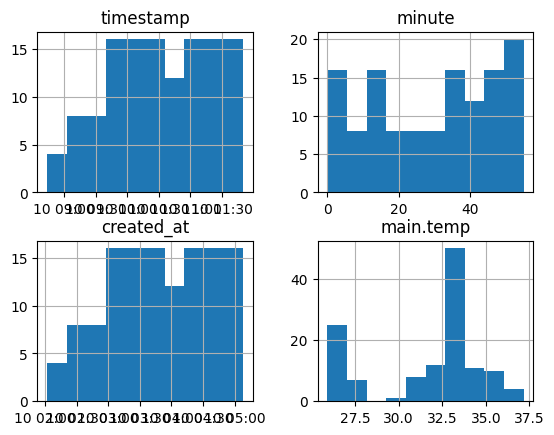

In [15]:
df2.hist()